# Diwali Sales Analysis using the python

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [191]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [192]:
# remove unwanted or blank columns  
df.drop(['Status','unnamed1'],axis=1, inplace=True) 

# axis = 1 ==>  entire column
# inplace  = True ==>  change in original data and save it 

In [193]:
# it tell the how many rows and columns
df.shape

(11251, 13)

In [194]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [195]:
# getting the details about column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [196]:
# getting how much null value in each column
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [197]:
# remove the null value means entire row
df.dropna(inplace=True)

In [198]:
df.shape
# (11251, 13)

(11239, 13)

In [199]:
# change datatype
df['Amount'] = df['Amount'].astype('int')

In [200]:
df['Amount'].dtype

dtype('int64')

In [201]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [202]:
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [203]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [204]:
# specific describe 
df[['Orders','Amount']].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


## Actual Data Analysis

### Gender

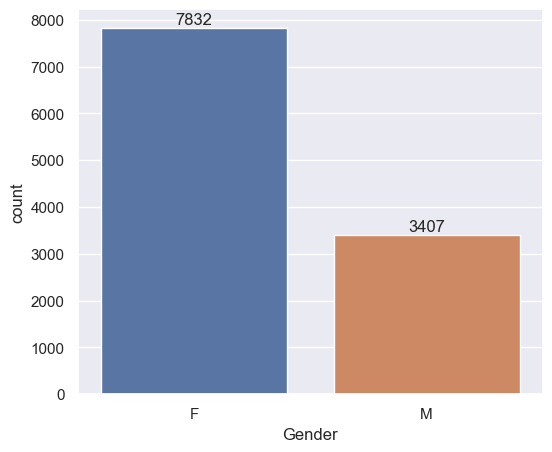

In [205]:
ax = sns.countplot(data=df, x='Gender', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

# bar count plot of gender and it's count

<Axes: xlabel='Gender', ylabel='Amount'>

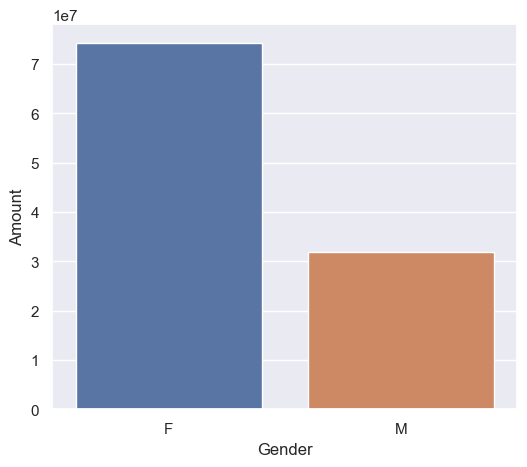

In [206]:
# now get the who spent the more money 
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_gen, x='Gender', y='Amount', hue='Gender')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

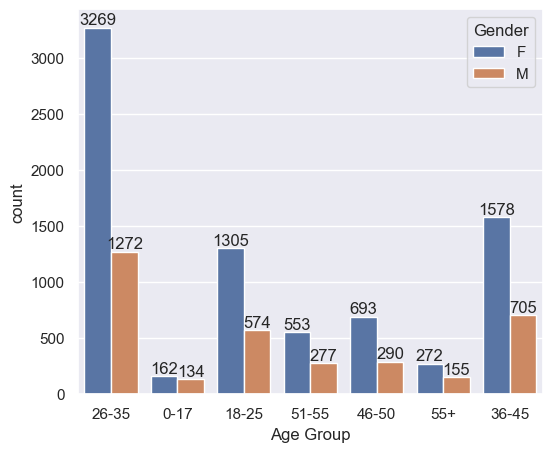

In [207]:
ax = sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

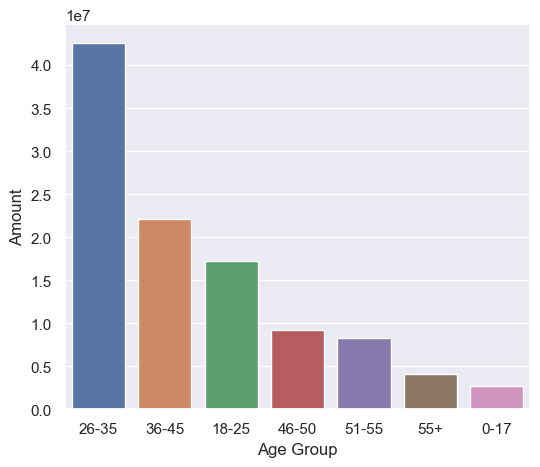

In [208]:
# Total Amount for age group
sales_age= df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(ascending=False, by='Amount')
print(sales_age)
sns.barplot(x='Age Group', y='Amount',data=sales_age, hue='Age Group')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [209]:
# Top 10 orders based on state
orders_state = df.groupby(['State',], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
orders_state.head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


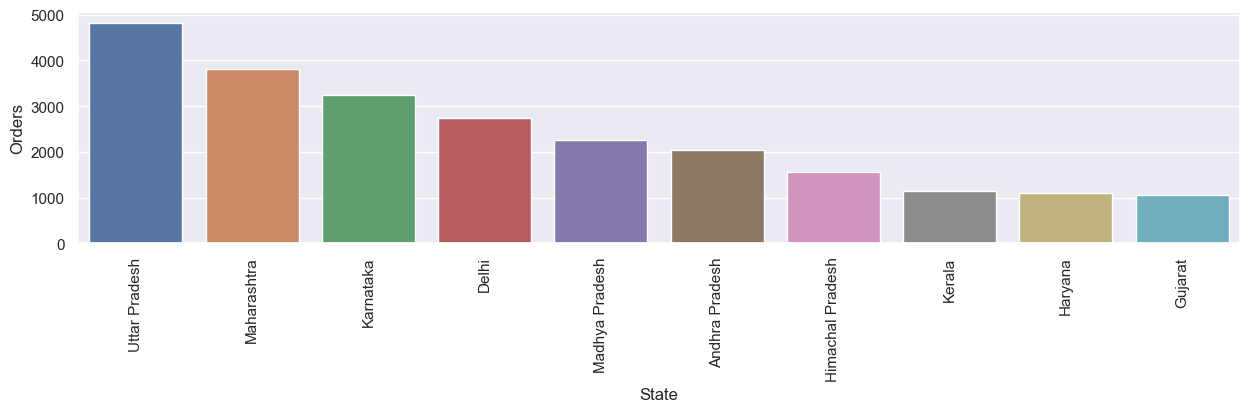

In [210]:
plt.figure(figsize=(15,3))
sns.barplot(data=orders_state, x='State', y='Orders', hue='State')
plt.xticks(rotation=90)
plt.show()

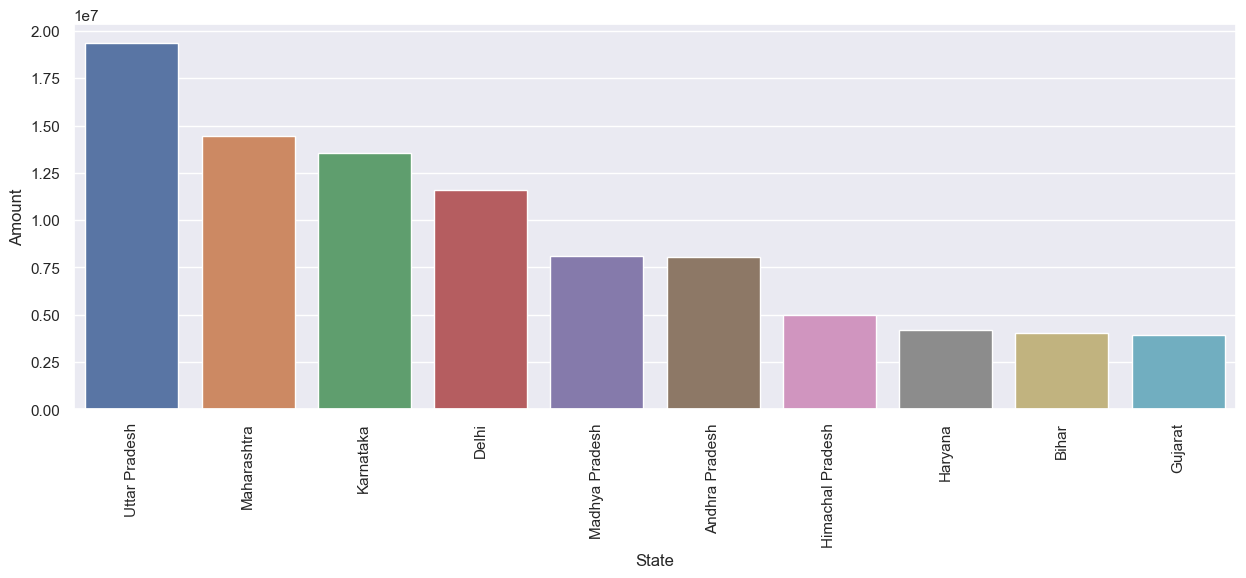

In [211]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Amount',data=sales_state, hue='State')
plt.xticks(rotation=90)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

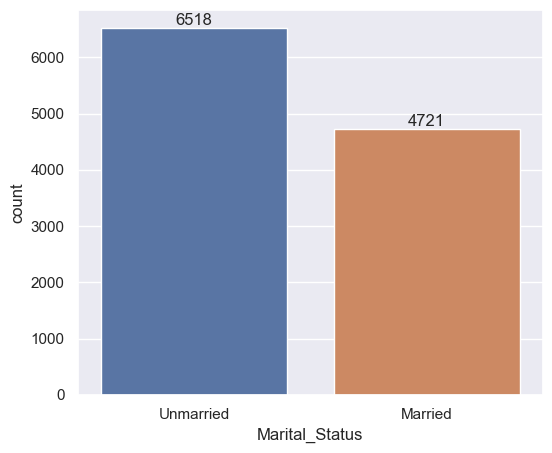

In [212]:
marital_label = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})
ax = sns.countplot(x=marital_label, hue=marital_label)
ax.set_xlabel('Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

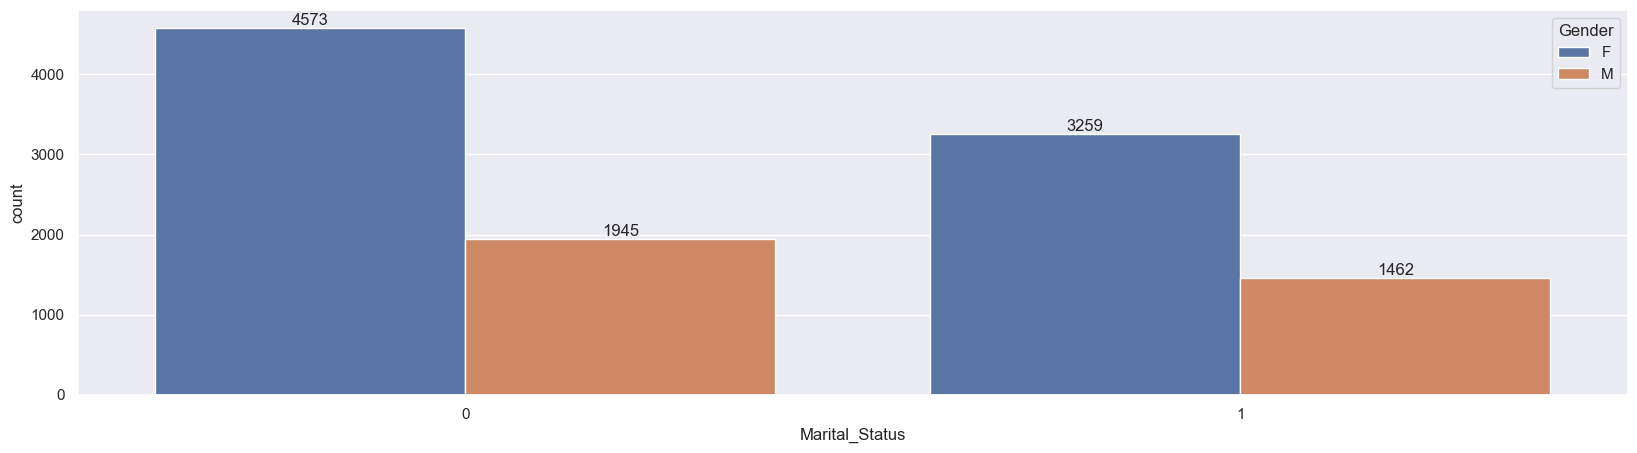

In [221]:
# count of buyers by marital status and gender

# marital_count = df.groupby(['Marital_Status', 'Gender']).size()
# marital_count['Marital_Status'] = marital_count['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})
# print(marital_count)
# ax = sns.barplot(data=marital_count, x='Marital_Status', y='size', hue='Gender')
# ax.set_ylabel('Count')

# for bars in ax.containers:
#     ax.bar_label(bars)


ax = sns.countplot(data=df,x='Marital_Status',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

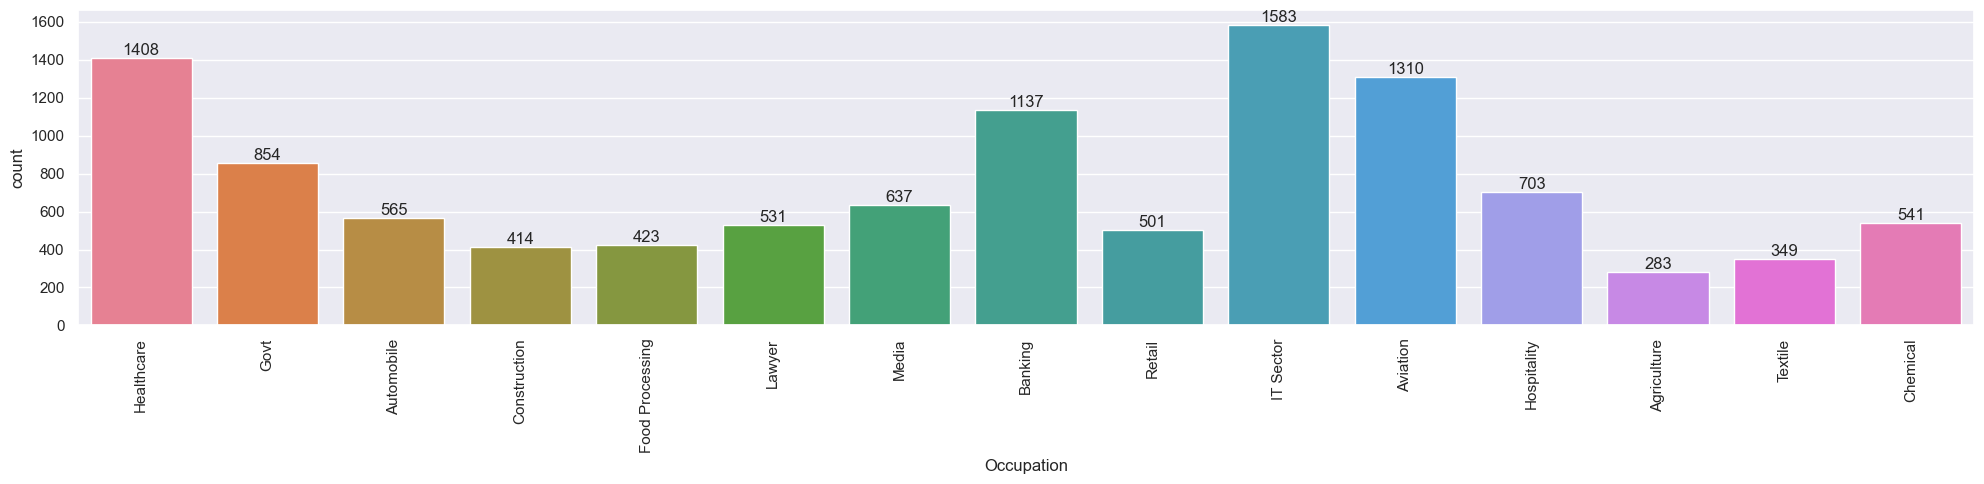

In [214]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data=df, x='Occupation', hue='Occupation')

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

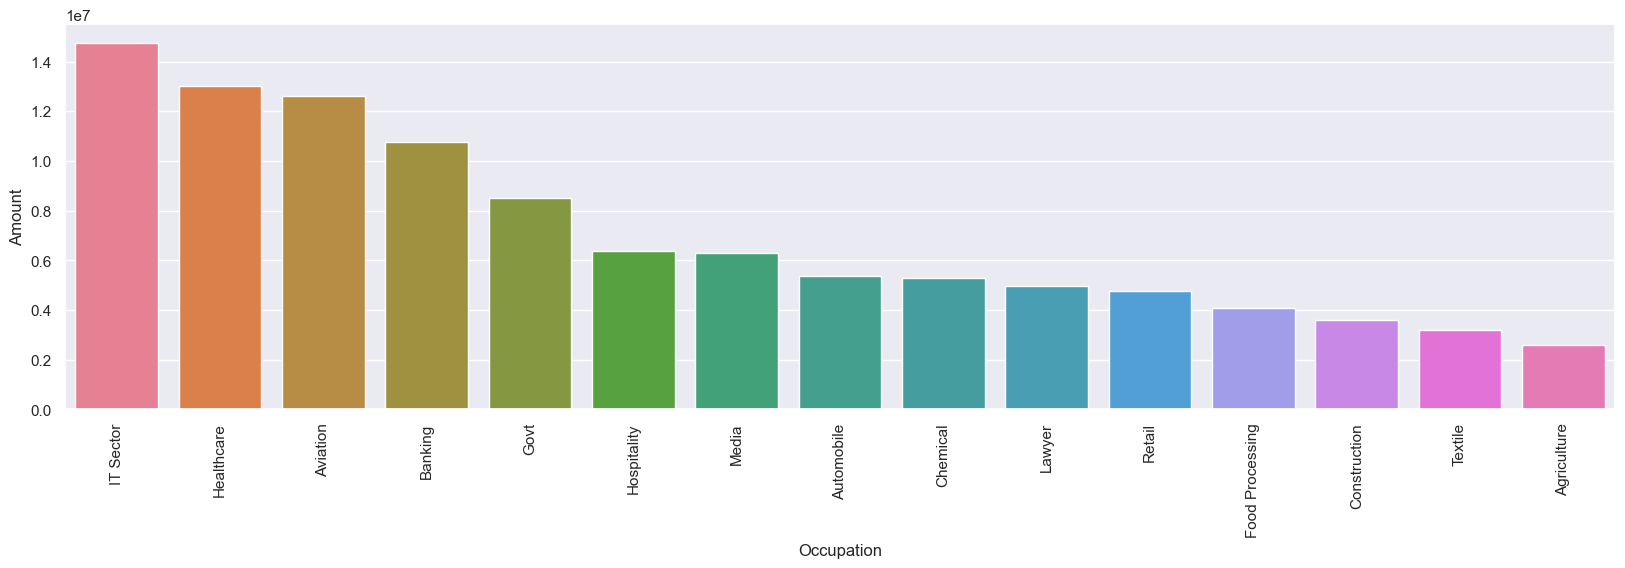

In [215]:
# total amount/occupation 
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(ascending=False,by='Amount')
plt.figure(figsize=(20,5))
sns.barplot(data=sales_occupation, x='Occupation',y='Amount', hue='Occupation')
plt.xticks(rotation =90)
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

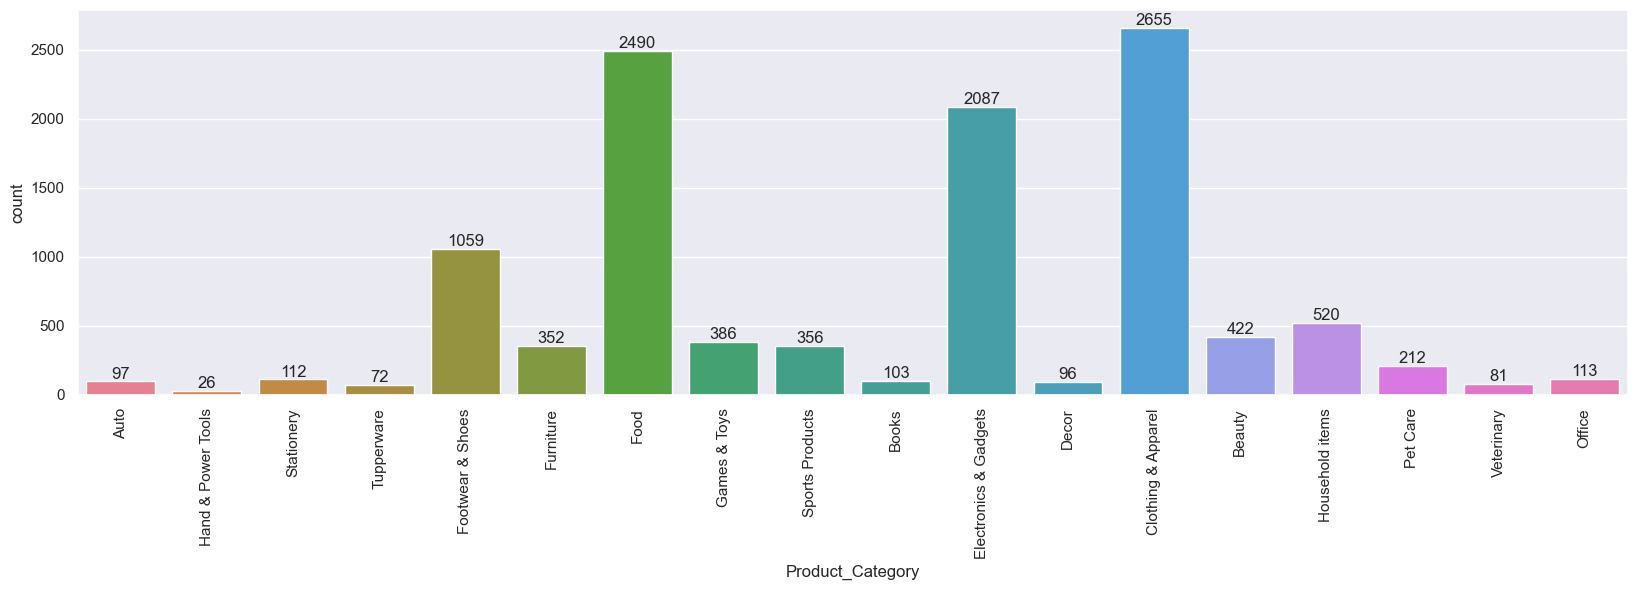

In [216]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Product_Category', ylabel='Amount'>

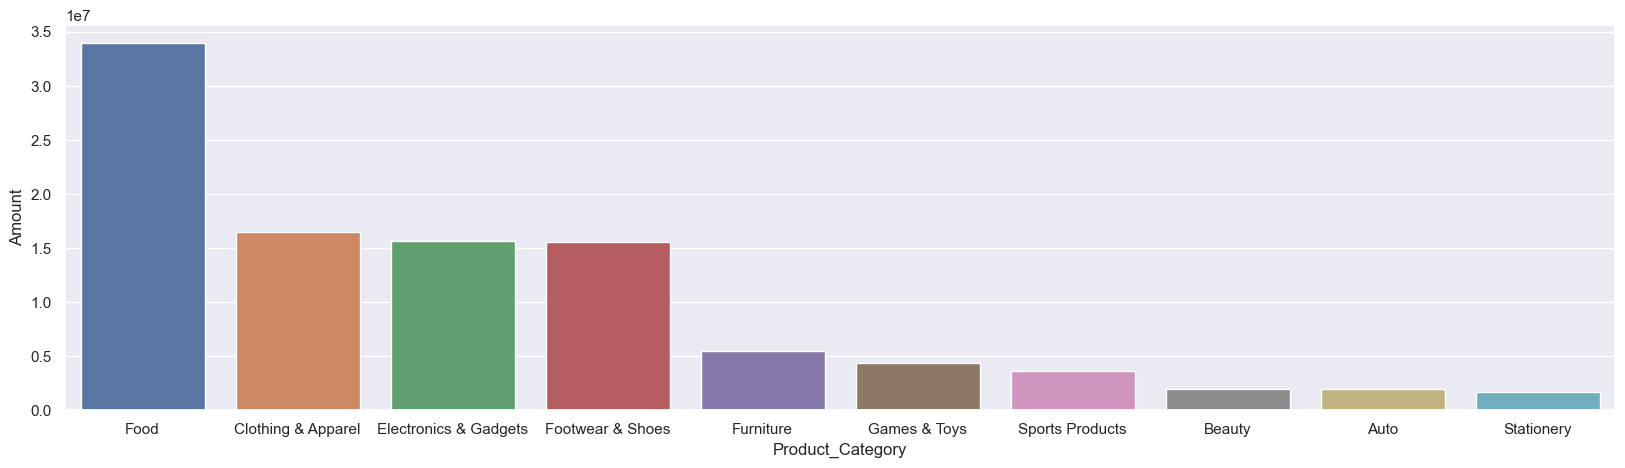

In [217]:
# Total amount\product from top 10 category 
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

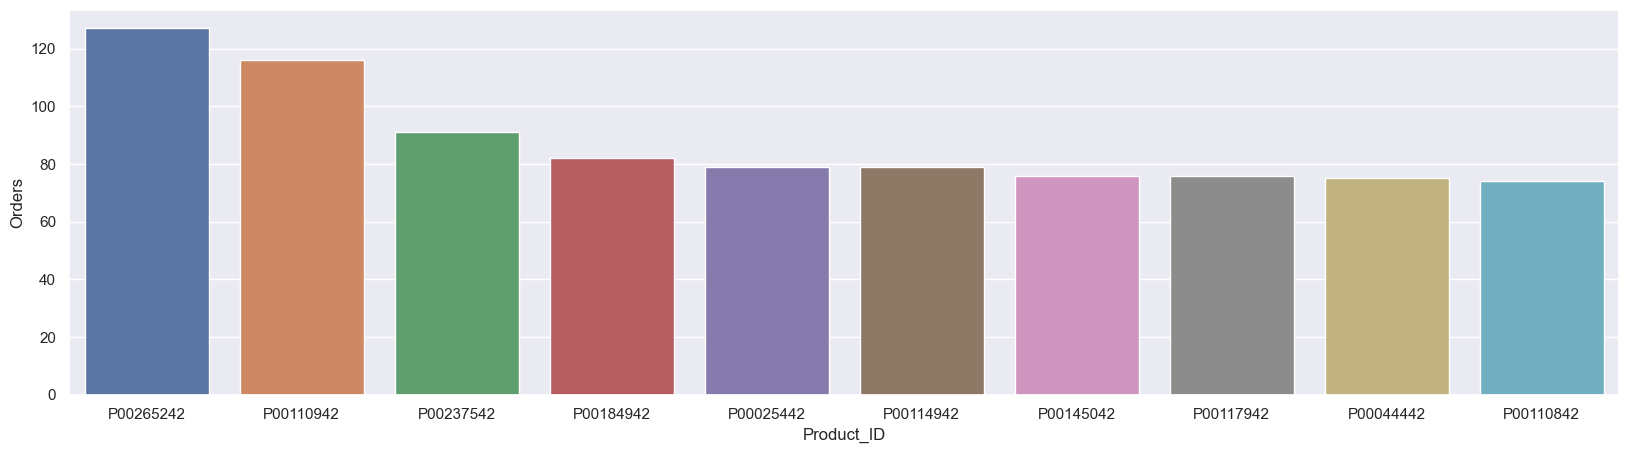

In [218]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID')

<Axes: xlabel='Product_ID'>

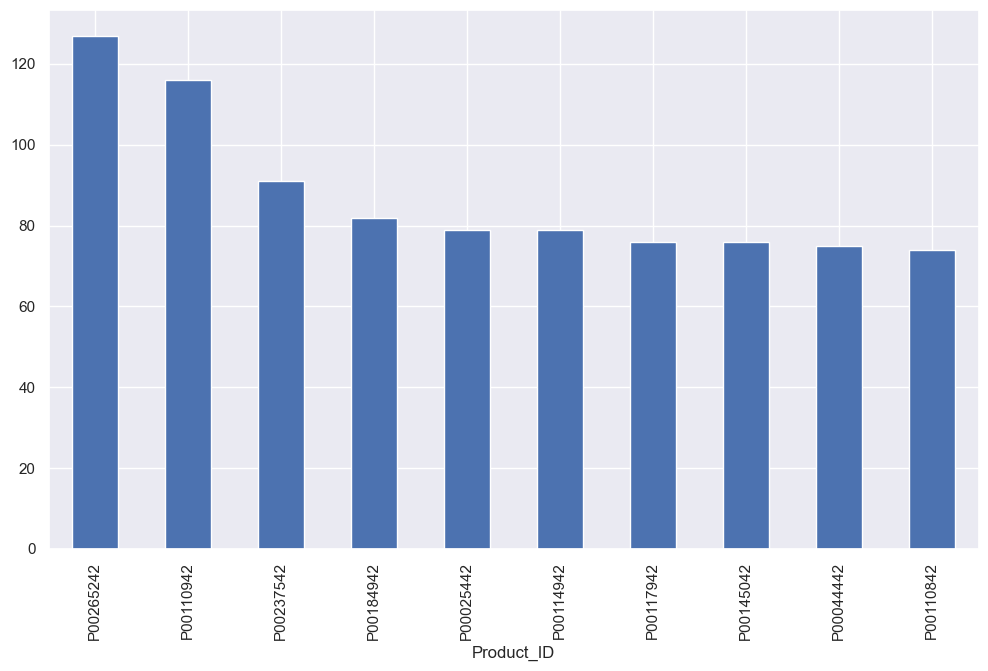

In [219]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# *Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*